In [ ]:
import scanpy as sc
import scvelo as scv

adata = sc.read_h5ad("/mnt/data2/home/leonardo/git/multilineage_velocity/benchmark/lsvelo/pca_1/forebrain/lsvelo_forebrain.h5ad")

In [ ]:
from scvelo_adapted_plots import plot_phase_plane

In [16]:
adata.layers["velocity"] *=-1
adata.layers["velocity_u"] *=-1

computing velocity graph (using 1/24 cores)


    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


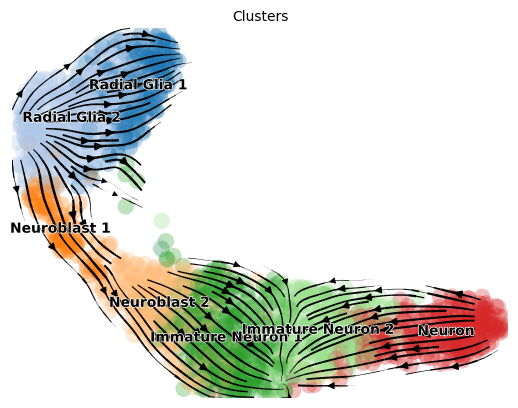

In [18]:
sc.pp.neighbors(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color="Clusters")

In [ ]:
plot_phase_plane(adata, gene_name="Gnas", cell_type_key="Clusters", u_scale=.01, s_scale=.01)